In [27]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from func_maps import readMaps
from func_stat import *
from func_visualizations import *
from func_dataset_preprocessing import residCol
from os.path import join
from ast import literal_eval

In [32]:
dirSOM=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle'
nameOfExperiment='ex018'
dirMaps=join(dirSOM,nameOfExperiment,'maps')
dirPlots=join(dirSOM,nameOfExperiment,'plots')
dirDatasets=join(dirSOM,nameOfExperiment,'datasets')
dirMLPQNAExps=join('D:\Sources\COSMOS_photoZ\COSMOS_v3.0\experimentsArticle')
fileWithSOMTrain='05_COSMOS_SpectrZ_Zlim_1p2_SOMinfo.csv'
fileWithSOMTest='05_COSMOS_SpectrZ_Zlim_1p2_Test_SOMinfo.csv'

In [33]:
SOMInfoTrain=pd.read_csv(join(dirDatasets,fileWithSOMTrain))
SOMInfoTest=pd.read_csv(join(dirDatasets,fileWithSOMTest))

In [34]:
SOMInfo=SOMInfoTrain.append(SOMInfoTest)

In [3]:
idCol='Seq'
specZ='specZ'
photoZ_ML='photoZ_ML'
photoZ_SED='photoZ_SED'
residML='resid_ML'
residSED='resid_SED'
residML_SED='residML_SED'
quantErr='quantErr'

In [4]:
expResults=[]
for i in range(11,20):
    train=pd.read_csv(join(dirMLPQNAExps,'exp0'+str(i),'METAPHOR_trainout_05_COSMOS_SpectrZ_Zlim_1p2_AllBands_colors.csv'))
    test=pd.read_csv(join(dirMLPQNAExps,'exp0'+str(i),'METAPHOR_testout_05_COSMOS_SpectrZ_Zlim_1p2_AllBands_colors.csv'))
    full=train.append(test,ignore_index=True)
    expResults.append(full)

In [8]:
ensemble=expResults[0]
for data in expResults[1:]:
    ensemble=ensemble.merge(data,on='Seq')

In [10]:
ensemble=ensemble.drop([c for c in ensemble.columns if 'z_spec' in c],axis=1)

In [13]:
ensemble['Std']=ensemble[[c for c in ensemble.columns if 'zphoto' in c]].std(axis=1)
ensemble['Mean']=ensemble[[c for c in ensemble.columns if 'zphoto' in c]].mean(axis=1)
ensemble['Median']=ensemble[[c for c in ensemble.columns if 'zphoto' in c]].median(axis=1)

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [14]:
ensemble

,Seq,zphoto_x,zphoto_y,zphoto_x,zphoto_y,zphoto_x,zphoto_y,zphoto_x,zphoto_y,zphoto,Std,Mean,Median
0,548386,0.918455,0.953232,0.905686,0.919194,0.941113,0.912289,0.917180,0.955621,0.914675,0.018179,0.927447,0.918455
1,844990,0.635707,0.641128,0.637595,0.628952,0.636333,0.634847,0.633229,0.644747,0.636215,0.004496,0.636557,0.636215
2,350923,0.132867,0.125487,0.143219,0.124855,0.111705,0.127726,0.115956,0.109522,0.107816,0.010915,0.123429,0.124855
3,586803,0.855469,0.873634,0.851444,0.846745,0.865738,0.826927,0.810020,0.830441,0.836532,0.019950,0.844794,0.846745
4,664674,0.366456,0.374800,0.367278,0.370636,0.362616,0.374248,0.365949,0.359133,0.373570,0.005177,0.367819,0.367278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19171,568485,0.393739,0.389603,0.382238,0.392988,0.395841,0.393241,0.374652,0.369536,0.384355,0.009248,0.386415,0.389603
19172,272891,0.304016,0.306956,0.300208,0.297360,0.301257,0.301170,0.296502,0.312602,0.297945,0.005003,0.302371,0.301170
19173,793282,0.450523,0.382896,0.408365,0.266450,0.360623,0.327630,0.308252,0.250744,0.450571,0.067329,0.347652,0.360623
19174,408387,0.365948,0.345239,0.360707,0.366216,0.360285,0.360932,0.362442,0.357421,0.360942,0.006186,0.359930,0.360932


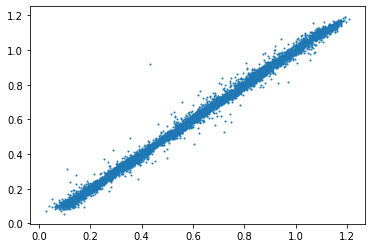

In [17]:
plt.scatter(ensemble['zphoto'],ensemble['Median'],s=1)

In [36]:
SOMInfoEns=SOMInfo.merge(ensemble,on='Seq')

In [37]:
SOMInfoEns.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'IB574ap3', 'photoZ_SED', 'specZ', 'Instr', 'Q_f',
       'sc_Ksmagap3', 'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3',
       'sc_Vmagap3', 'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3',
       'photoZ_ML', 'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3',
       'w_sc_Ymagap3', 'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3',
       'w_sc_Vmagap3', 'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3',
       'w_sc_zppmagap3', 'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM',
       'cellID_RunBigSOM', 'specZ_outlCoeff', 'photoZ_ML_outlCoeff',
       'photoZ_SED_outlCoeff', 'quantErr_outlCoeff', 'trainMapOccupation',
       'zphoto_x', 'zphoto_y', 'zphoto_x', 'zphoto_y', 'zphoto_x', 'zphoto_y',
       'zphoto_x', 'zphoto_y', 'zphoto', 'Std', 'Mean', 'Median'],
      dtype='object')

In [38]:
SOMInfoEns=residCol(SOMInfoEns,colSpectrZ='specZ', colPhotoZ='Median',colResid='resid_Ens')

In [40]:
print(statResid(SOMInfoEns,residML))

{'Num objects': 19176, 'Std': 0.047, 'NMAD': 0.018, 'Mean': -0.0021, '% outl_15': 1.75}


In [41]:
print(statResid(SOMInfoEns,'resid_Ens'))

{'Num objects': 19176, 'Std': 0.046, 'NMAD': 0.017, 'Mean': -0.0019, '% outl_15': 1.73}


In [42]:
print(statResid(SOMInfoEns,residSED))

{'Num objects': 19176, 'Std': 0.098, 'NMAD': 0.011, 'Mean': -0.0053, '% outl_15': 2.42}


In [43]:
print(statResid(SOMInfoEns[SOMInfoEns['specZ_outlCoeff'].abs()<1.5],'resid_Ens'))

{'Num objects': 16877, 'Std': 0.026, 'NMAD': 0.016, 'Mean': 0.0004, '% outl_15': 0.3}


In [45]:
print(statResid(SOMInfoEns[SOMInfoEns['specZ_outlCoeff'].abs()<1.5],residML))

{'Num objects': 16877, 'Std': 0.027, 'NMAD': 0.017, 'Mean': 0.0001, '% outl_15': 0.33}
